In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
# load the dataset

titanic_df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# check the shape of the dataset

titanic_df.shape

(891, 12)

In [4]:
# display the first few rows of the dataset

titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# check the data types and non-null counts

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check the column names

titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# check for missing values

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# drop cabin column
titanic_df.drop('Cabin', axis=1, inplace=True)

In [9]:
# fill missing vales in age with mean

titanic_df['Age']= titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [10]:
# fill missing values in embarked with mode

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [11]:
# check for missing values

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# function to categorize age

def age_category(age):
    if age < 18:
        return "child"
    elif 18 <= age <=50:
        return "adult"
    else:
        return "sr. citizen"

In [13]:
# apply the function to create a new column 'age category'

titanic_df["age category"] = titanic_df['Age'].apply(func=age_category)
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked age category  
0      0         A/5 21171   7.2500        S        adult  
1      0          PC 17599  71.2833        C        adult  
2      0  STON/O2. 3101282   7.9250        S        adult  
3      0            113803  53.1000        S        adult  
4      0            373450   8.0500        S        adult

In [14]:
# check the descriptive statistics of the dataset

titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [15]:
# pivot table to calculate the average age by category and sex

average_age_by_category = titanic_df.pivot_table(index="age category",columns= "Sex" , values="Age", aggfunc="mean")
print(average_age_by_category)


Sex              female       male
age category                      
adult         30.545675  30.275828
child          9.236364   8.856379
sr. citizen   56.470588  59.531915


[Text(0, 0, '81'), Text(0, 0, '233')]

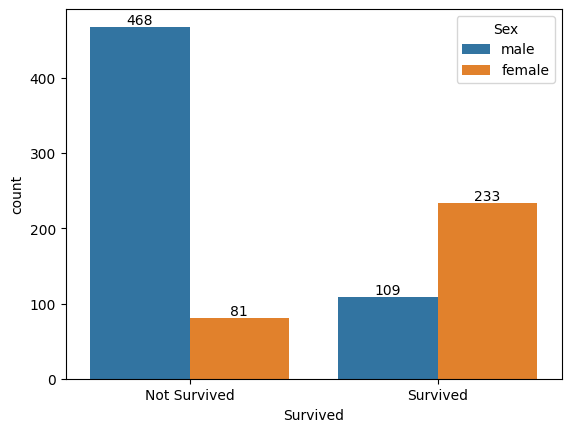

In [16]:
# Create a count plot showing the number of survivors and non-survivors, grouped by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])


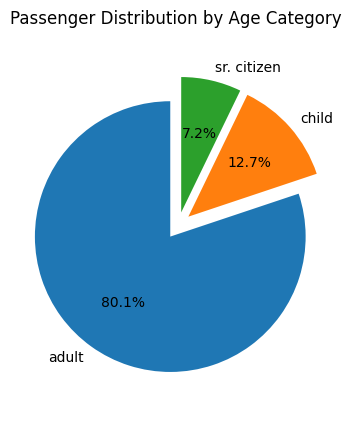

In [17]:
# Create a pie chart showing the distribution of passengers by age category
age_cat_counts = titanic_df['age category'].value_counts()

plt.figure(figsize=(4,5))
plt.pie(age_cat_counts.values, 
        labels=age_cat_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=(0.1, 0.1, 0.1))  # Slightly explode each slice for emphasis

plt.title('Passenger Distribution by Age Category')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()

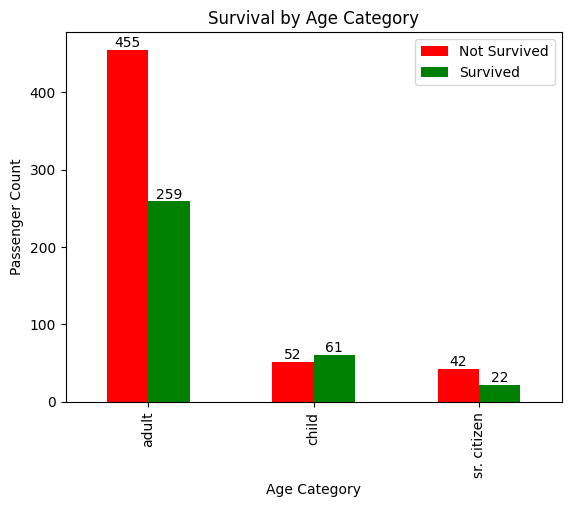

In [18]:
# Create a bar chart showing the survival rate by age category
survival_by_age_cat = titanic_df.groupby(['age category', 'Survived']).size().unstack()

survival_by_age_cat.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Survival by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Passenger Count')
plt.legend(['Not Survived', 'Survived'])
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])
plt.show()

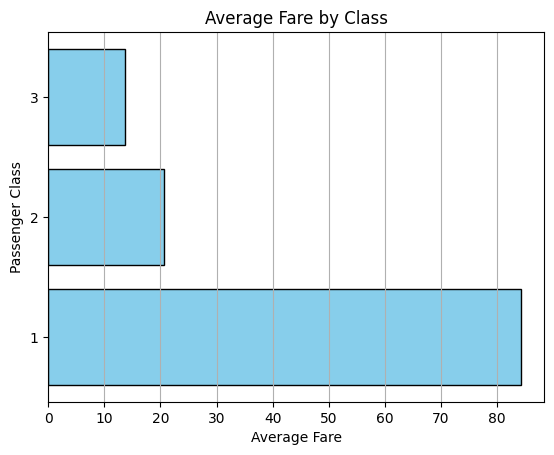

In [19]:
# create a horizontal bar chart showing the average fare of class

fare_distribution = titanic_df.groupby('Pclass')['Fare'].mean()
plt.barh(fare_distribution.index.astype(str), fare_distribution.values, color='skyblue', edgecolor='black')
plt.xlabel('Average Fare')
plt.ylabel('Passenger Class')
plt.title('Average Fare by Class')
plt.grid(True, axis='x')
plt.show()


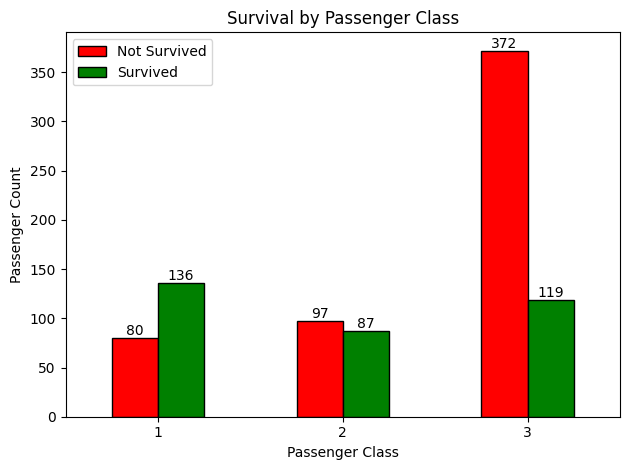

In [20]:
# # Create a grouped bar chart to show survival counts by clas
survival_by_class = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

survival_by_class.plot(kind='bar', stacked=False, color=['red', 'green'], edgecolor='black')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])
plt.tight_layout()
plt.show()


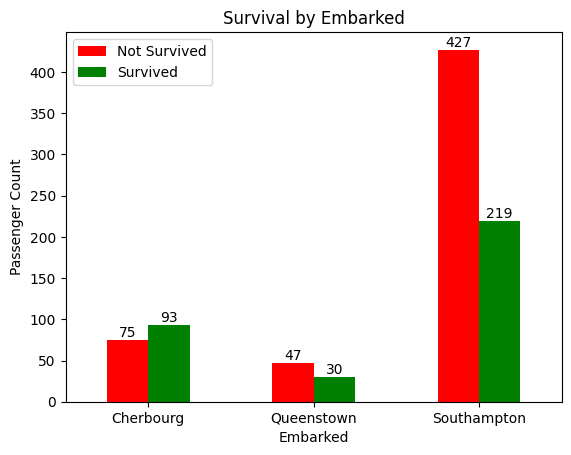

In [21]:
survival_by_embark = titanic_df.groupby(['Embarked', 'Survived']).size().unstack()

survival_by_embark.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Survival by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')
plt.xticks(ticks=range(len(survival_by_embark.index)),
           labels=['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])
plt.show()
